# **1**. **Introduction**

This project report provides a comprehensive analysis and preprocessing of a car dataset. The analysis includes data cleaning, visualization, correlation analysis, feature encoding, and preparation for machine learning model training. The goal is to develop a predictive model that accurately estimates car prices based on various features.


# **2**. **Data** **Overview**

The dataset consists of car details such as city, brand, model, fuel type, transmission, and other features relevant to car pricing. The data is loaded, inspected for null values and duplicates, and basic statistical descriptions are reviewed

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/car_data.csv')
df

,Unnamed: 0,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
0,0,Ford,Focus,550000,Astrakhan,gasoline,manual,FWD,300000,USA,1.8,125,14
1,1,Mercedes-Benz,GLA-Class,1820000,Astrakhan,gasoline,robot,FWD,88000,DE,1.6,156,10
2,2,Haval,F7,2600000,Astrakhan,gasoline,robot,4WD,19000,CN,1.5,150,2
3,3,Toyota,Camry,4200000,Astrakhan,gasoline,automatic,FWD,30000,JP,3.5,249,2
4,4,OMODA,C5,2125000,Astrakhan,gasoline,CVT,FWD,18824,CN,1.5,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42084,42084,Isuzu,Bighorn,450000,Yakutsk,diesel,automatic,4WD,183212,JP,3.1,125,30
42085,42085,Toyota,Corolla Axio,650000,Yakutsk,gasoline,CVT,FWD,110000,JP,1.5,110,13
42086,42086,Daihatsu,Be-Go,1350000,Yakutsk,gasoline,automatic,4WD,153000,JP,1.5,109,13
42087,42087,Mazda,Tribute,550000,Yakutsk,gasoline,automatic,4WD,190000,JP,2.0,129,23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42089 entries, 0 to 42088
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           42089 non-null  int64  
 1   car_brand            42089 non-null  object 
 2   car_model            42089 non-null  object 
 3   car_price            42089 non-null  int64  
 4   car_city             42089 non-null  object 
 5   car_fuel             42089 non-null  object 
 6   car_transmission     42089 non-null  object 
 7   car_drive            42089 non-null  object 
 8   car_mileage          42089 non-null  int64  
 9   car_country          42089 non-null  object 
 10  car_engine_capacity  42089 non-null  float64
 11  car_engine_hp        42089 non-null  int64  
 12  car_age              42089 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 4.2+ MB


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
car_brand,0
car_model,0
car_price,0
car_city,0
car_fuel,0
car_transmission,0
car_drive,0
car_mileage,0
car_country,0


In [ ]:
df.describe()

,Unnamed: 0,car_price,car_mileage,car_engine_capacity,car_engine_hp,car_age
count,42089.000000,4.208900e+04,42089.000000,42089.000000,42089.000000,42089.000000
mean,21044.000000,1.712717e+06,144846.070517,1.977084,147.329373,11.697261
std,12150.192077,1.976693e+06,92460.616254,0.782458,69.438003,7.379045
min,0.000000,7.000000e+03,1.000000,0.600000,30.000000,0.000000
25%,10522.000000,7.300000e+05,76500.000000,1.600000,105.000000,6.000000
50%,21044.000000,1.250000e+06,134500.000000,1.700000,130.000000,11.000000
75%,31566.000000,2.024900e+06,200000.000000,2.000000,170.000000,16.000000
max,42088.000000,7.000000e+07,996658.000000,8.000000,1197.000000,84.000000


In [ ]:
df.duplicated().sum()

0

# **3**. **Data** **Cleaning** **and** **Preparation**

Unnecessary columns are removed to streamline the dataset, and histograms are plotted to understand the data distribution.


In [ ]:
df.drop(columns=["Unnamed: 0"],inplace=True)

# **4**. **Visualizations**

Various visualizations, including histograms are used to understand the data distribution and correlations. The `car_price` distribution and correlation matrix provide insights into relationships between features.



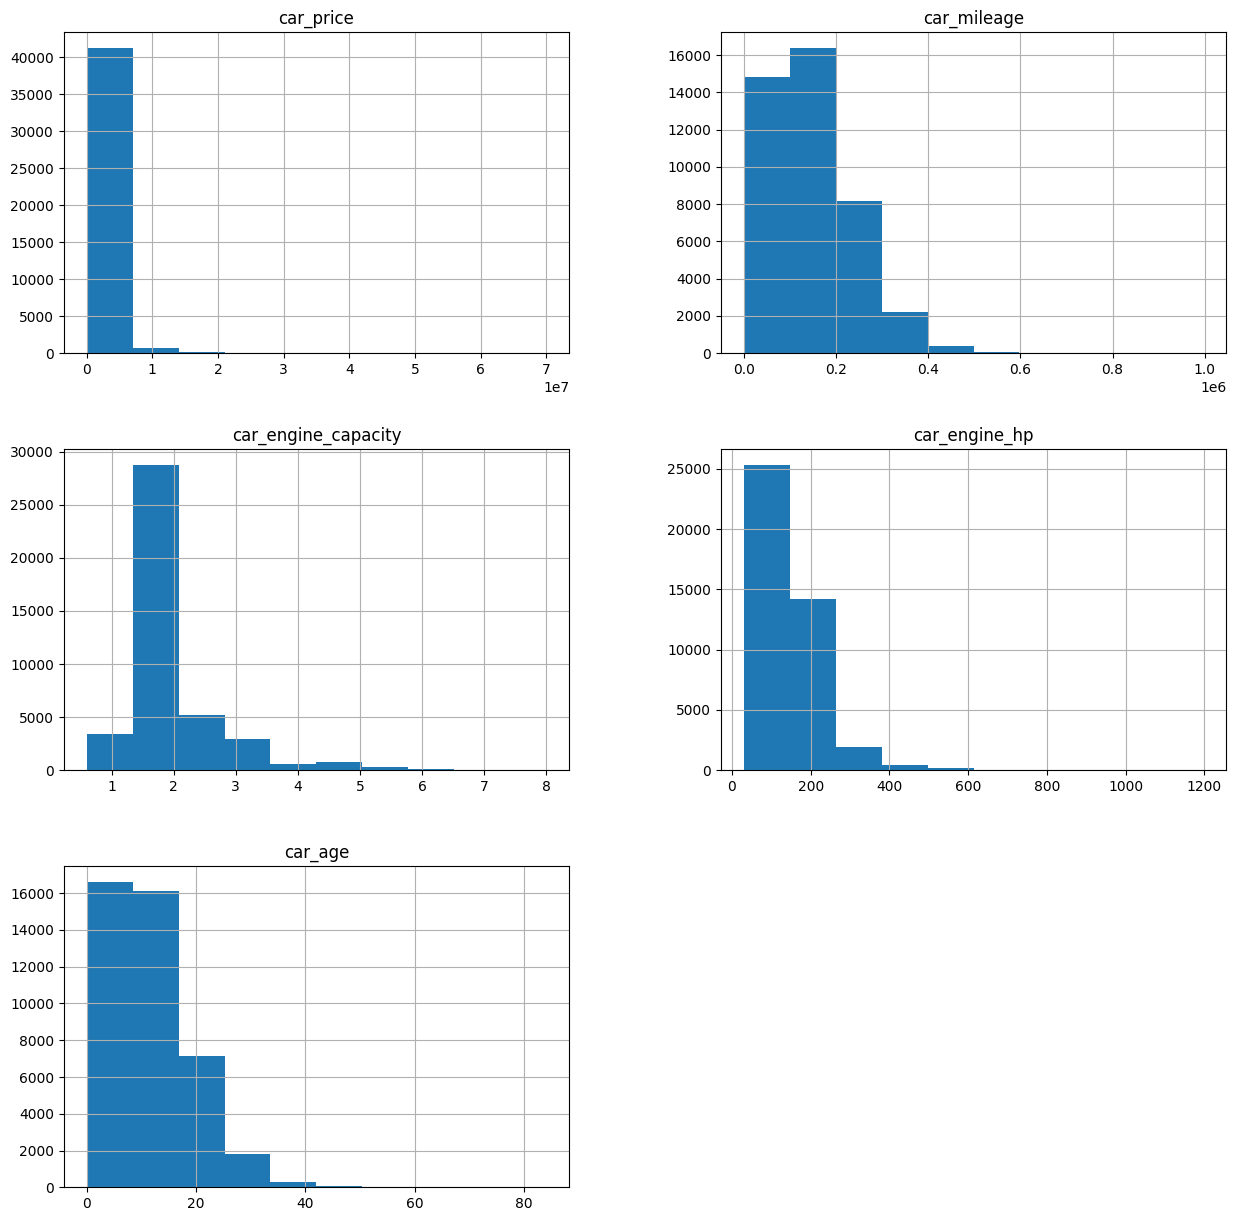

In [ ]:
df.hist(figsize=(15,15))
plt.show()

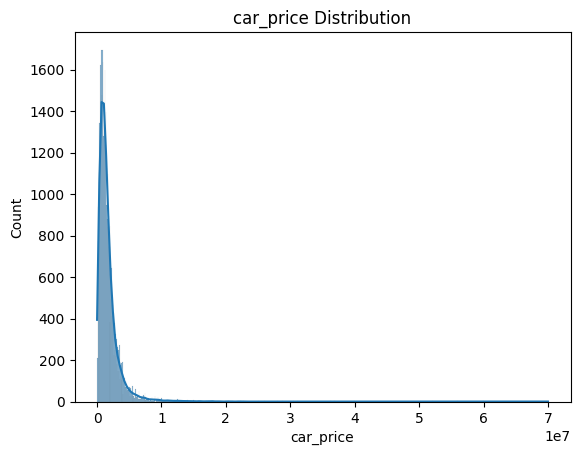

In [ ]:
sns.histplot(df['car_price'], kde=True)
plt.title('car_price Distribution')
plt.show()


In [ ]:
df

,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
0,Ford,Focus,550000,Astrakhan,gasoline,manual,FWD,300000,USA,1.8,125,14
1,Mercedes-Benz,GLA-Class,1820000,Astrakhan,gasoline,robot,FWD,88000,DE,1.6,156,10
2,Haval,F7,2600000,Astrakhan,gasoline,robot,4WD,19000,CN,1.5,150,2
3,Toyota,Camry,4200000,Astrakhan,gasoline,automatic,FWD,30000,JP,3.5,249,2
4,OMODA,C5,2125000,Astrakhan,gasoline,CVT,FWD,18824,CN,1.5,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
42084,Isuzu,Bighorn,450000,Yakutsk,diesel,automatic,4WD,183212,JP,3.1,125,30
42085,Toyota,Corolla Axio,650000,Yakutsk,gasoline,CVT,FWD,110000,JP,1.5,110,13
42086,Daihatsu,Be-Go,1350000,Yakutsk,gasoline,automatic,4WD,153000,JP,1.5,109,13
42087,Mazda,Tribute,550000,Yakutsk,gasoline,automatic,4WD,190000,JP,2.0,129,23


# **5**. **Data** **Encoding**

Categorical variables are encoded using LabelEncoder to transform them into numerical values suitable for machine learning models. This step ensures the dataset is in a usable format for the predictive algorithms.


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['car_city']=labelencoder.fit_transform(df['car_city'])
df['car_brand']=labelencoder.fit_transform(df['car_brand'])
df['car_model']=labelencoder.fit_transform(df['car_model'])
df['car_fuel']=labelencoder.fit_transform(df['car_fuel'])
df['car_transmission']=labelencoder.fit_transform(df['car_transmission'])
df['car_drive']=labelencoder.fit_transform(df['car_drive'])
df['car_country']=labelencoder.fit_transform(df['car_country'])
df

,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
0,29,498,550000,0,1,2,1,300000,14,1.8,125,14
1,71,524,1820000,0,1,3,1,88000,2,1.6,156,10
2,39,472,2600000,0,1,3,0,19000,0,1.5,150,2
3,102,280,4200000,0,1,1,1,30000,7,3.5,249,2
4,76,244,2125000,0,1,0,1,18824,0,1.5,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
42084,48,204,450000,22,0,1,0,183212,7,3.1,125,30
42085,102,345,650000,22,1,0,1,110000,7,1.5,110,13
42086,20,192,1350000,22,1,1,0,153000,7,1.5,109,13
42087,70,1212,550000,22,1,1,0,190000,7,2.0,129,23


# **6**. **Feature** **Selection**

Features with low or no correlation to the target variable (`car_price`) are dropped to improve model efficiency. Highly correlated independent variables are also managed to avoid redundancy.



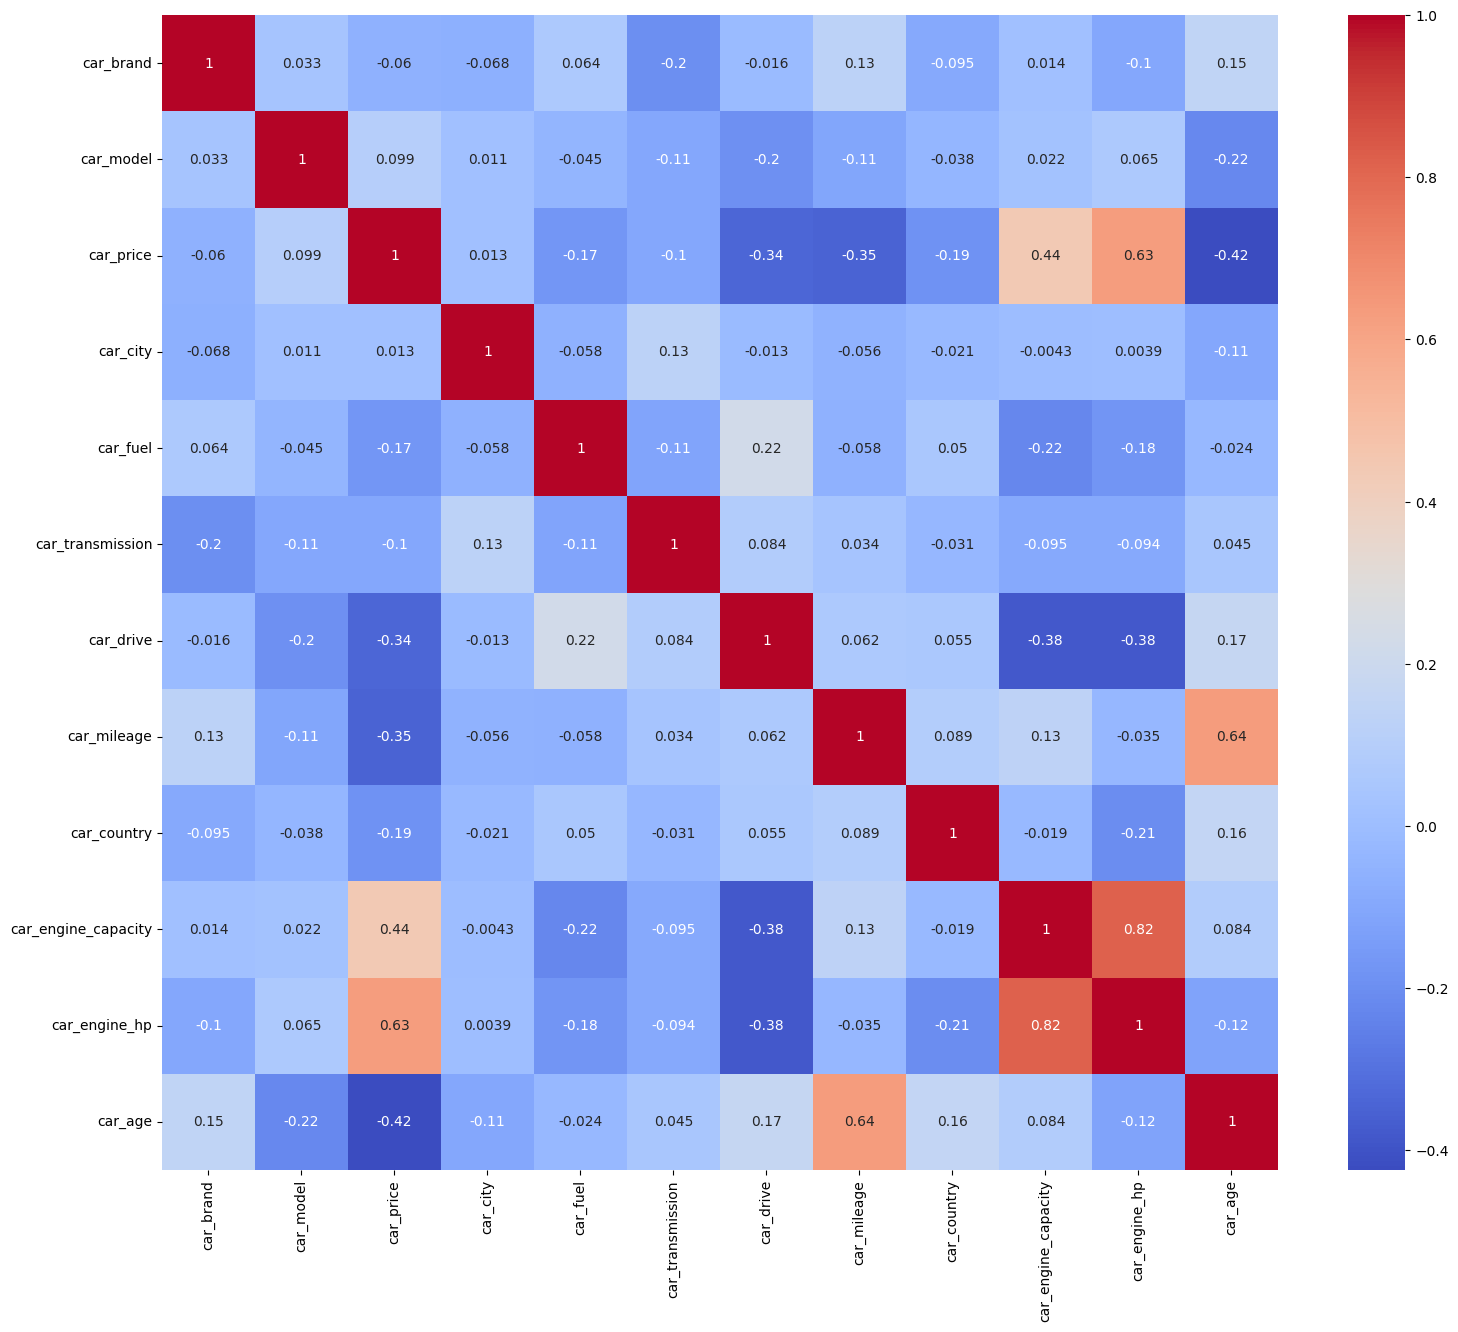

In [ ]:
corr_matrix=df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
s=df.corr()["car_price"]
s.sort_values(ascending=False)

,car_price
car_price,1.000000
car_engine_hp,0.627471
car_engine_capacity,0.438152
car_model,0.098695
car_city,0.012983
car_brand,-0.059802
car_transmission,-0.102614
car_fuel,-0.172521
car_country,-0.187577
car_drive,-0.336487


In [ ]:
# droping values with no and minimum correlation

df.drop(['car_model'],axis=1,inplace=True)
df.drop(['car_city'],axis=1,inplace=True)
df.drop(['car_brand'],axis=1,inplace=True)
df.drop(['car_transmission'],axis=1,inplace=True)
df.drop(['car_fuel'],axis=1,inplace=True)

#car engine hp and car engine capacity independent variables shows 0.8 highly correlated.we are taking car engine hp
df.drop(['car_engine_hp'],axis=1,inplace=True)

In [ ]:
sf=s=df.corr()["car_price"]
sf=s.sort_values(ascending=False)
sf

,car_price
car_price,1.000000
car_engine_capacity,0.438152
car_country,-0.187577
car_drive,-0.336487
car_mileage,-0.349092
car_age,-0.424384


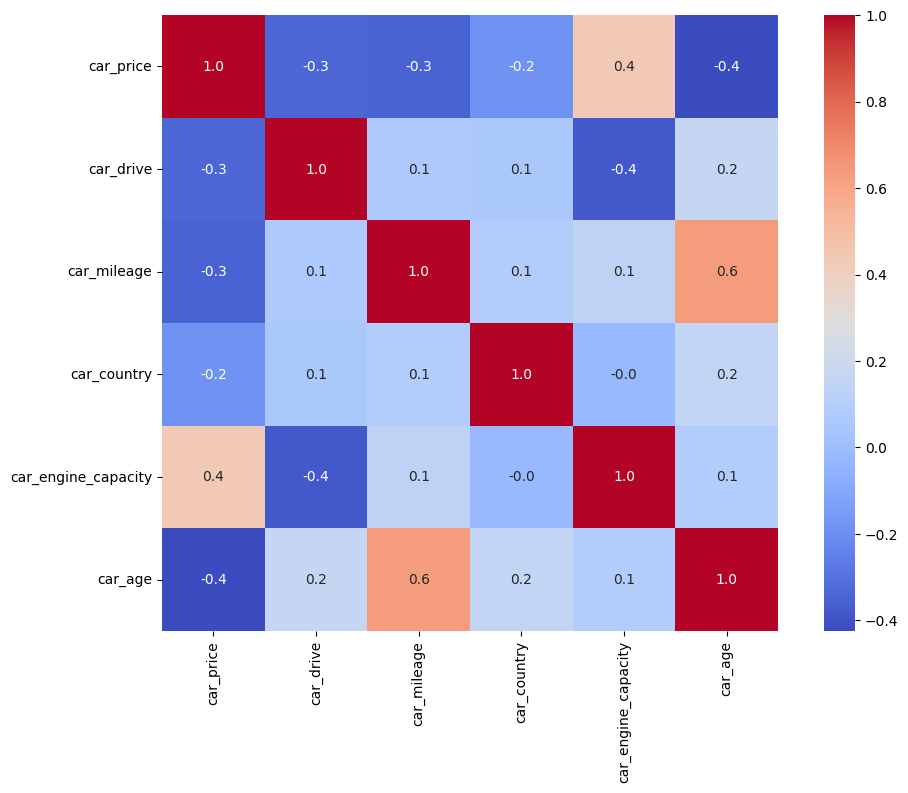

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True, fmt='0.01f', cmap='coolwarm',annot_kws=None, linewidths=0, robust=True,square=True)
plt.show()

In [ ]:
cor=df.corr()['car_price']#finding correlatiom
cor.sort_values(ascending=False)

,car_price
car_price,1.000000
car_engine_capacity,0.438152
car_country,-0.187577
car_drive,-0.336487
car_mileage,-0.349092
car_age,-0.424384


# **7** **Outlier** **Detection**

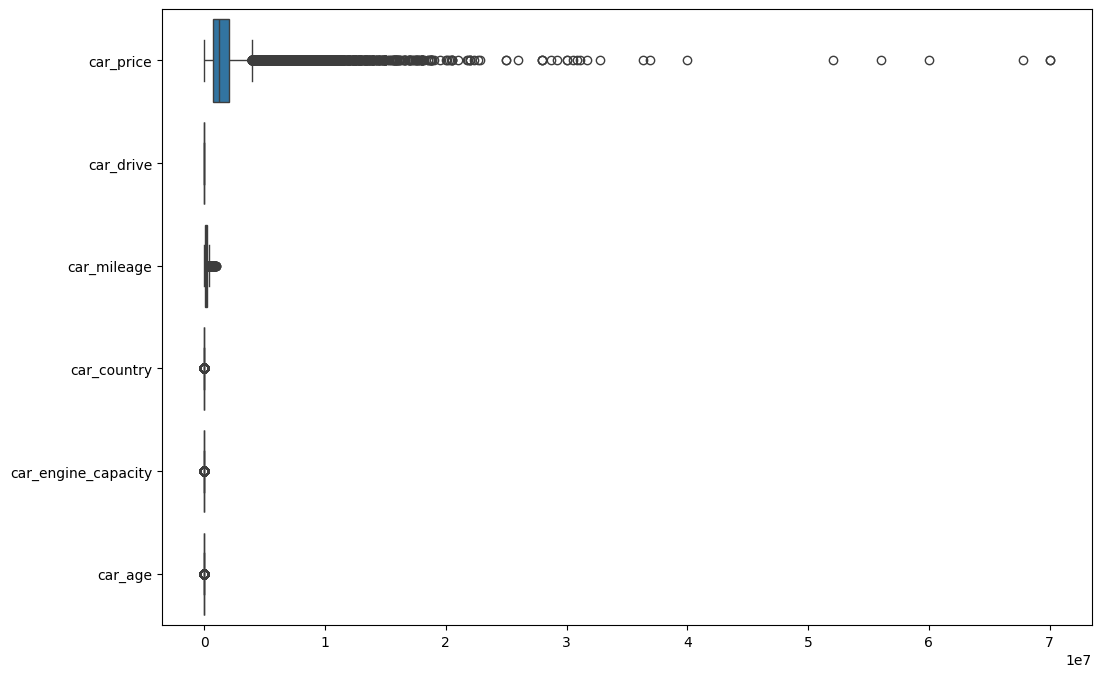

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(df, orient='h')
plt.show()

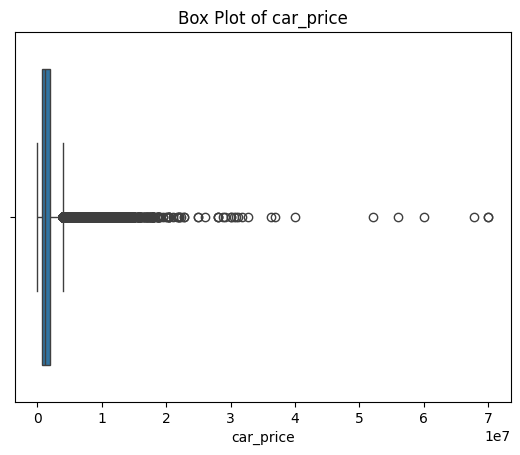

In [ ]:
sns.boxplot(x=df['car_price'])
plt.title('Box Plot of car_price')
plt.show()

# **8** **Handling** **Skewness**

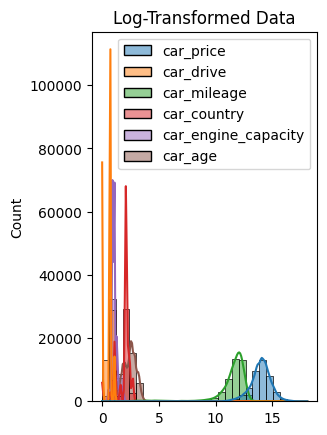

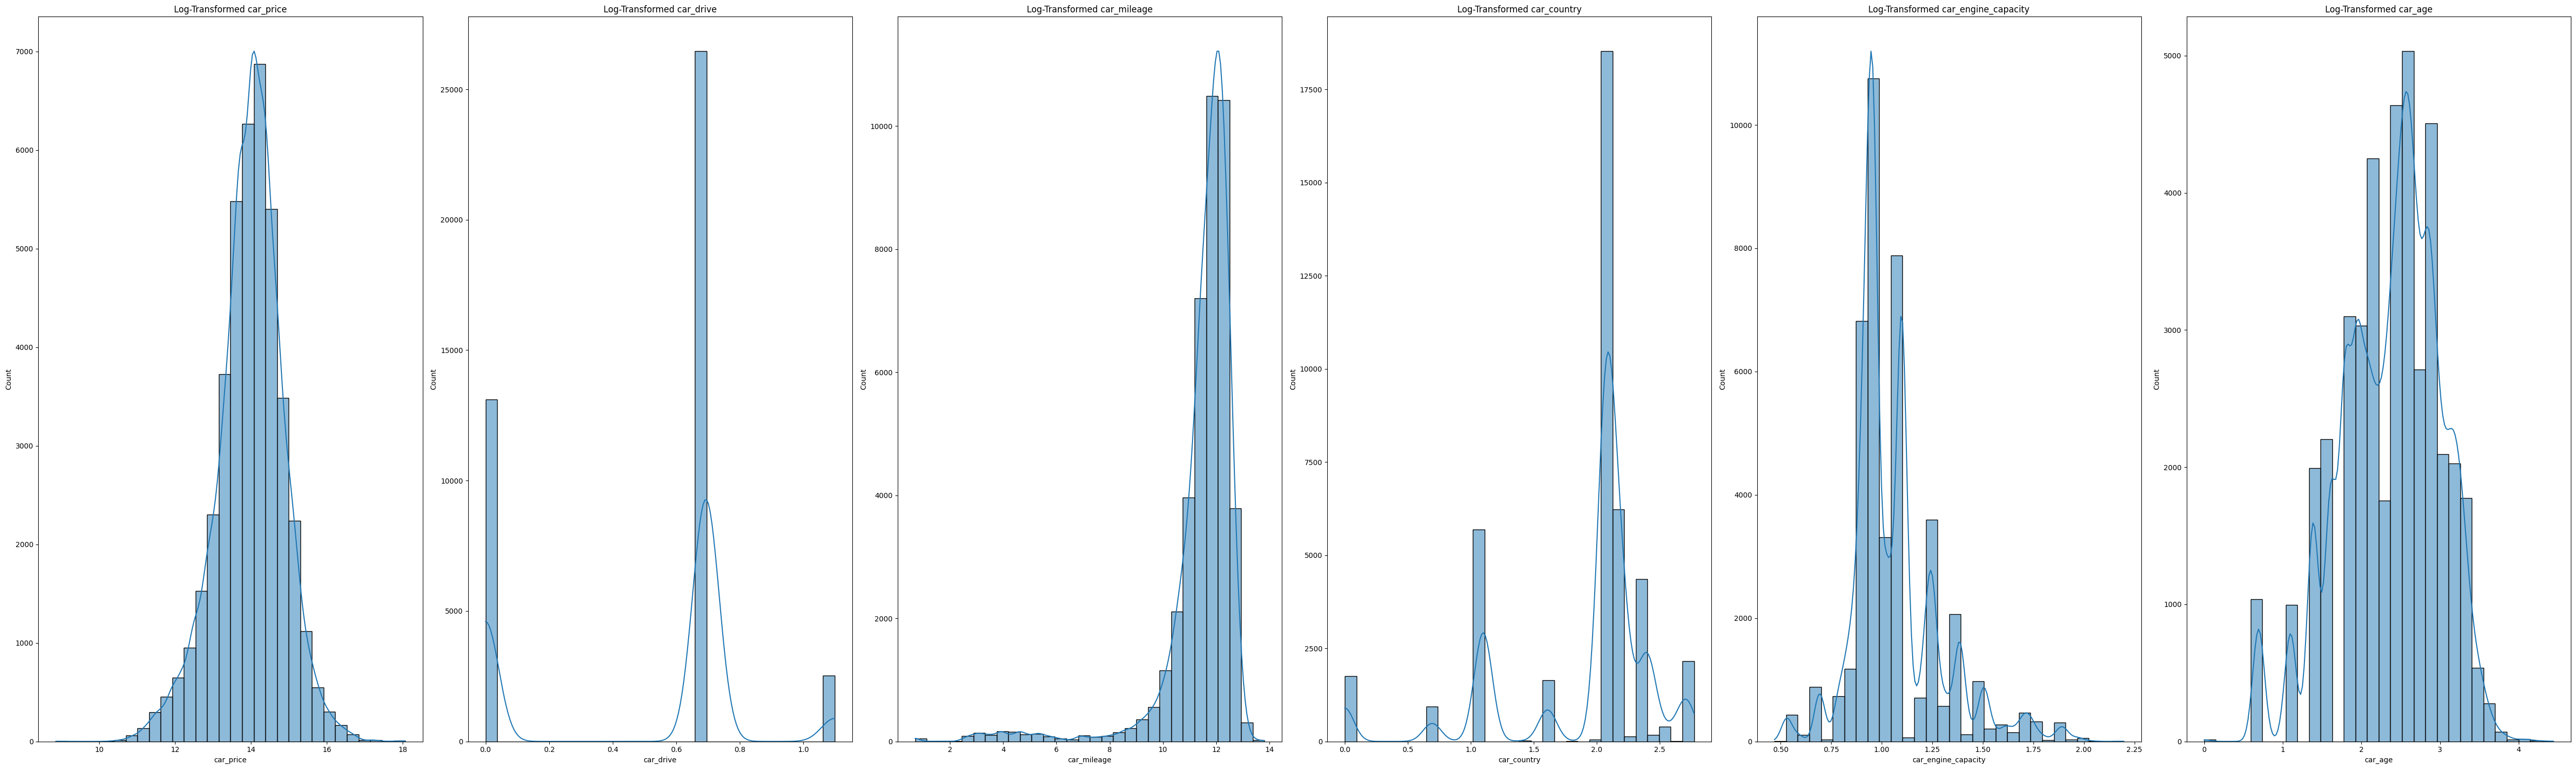

In [ ]:
#To handle skewness
import numpy as np
log_data = np.log(df + 1)  # Adding 1 to avoid log(0)

# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(log_data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming log_data is a DataFrame with multiple features
num_features = log_data.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(log_data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(log_data[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()

In [ ]:
log_data.shape

(42089, 6)

In [ ]:
df=log_data

# **9**. **Model** **Training**

The dataset is split into training and testing sets using an 80-20 split ratio. A `RandomForestRegressor` model is chosen for training due to its ability to handle complex non-linear data relationships. The model is trained on the training set and tested on the test set.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
independent_feature=['car_mileage','car_age','car_drive',"car_country",'car_engine_capacity'] #independent feature
dependent_feature=['car_price']#dependent feature
x=df[independent_feature]
y=df[dependent_feature]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,#0.2 means 20% of data specified for testing set,and the other 80% for training set
                                               random_state=42)# to take the same data for training and testing set

print(x_train.shape)  # Prints the shape of x_train (rows, columns)
print(x_test.shape)   # Prints the shape of x_test
print(y_train.shape)  # Prints the shape of y_train
print(y_test.shape)   # Prints the shape of y_test

(33671, 5)
(8418, 5)
(33671, 1)
(8418, 1)


# 10. **Model** **Evaluation**

Model performance is evaluated using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R2) score. The results indicate the model's predictive accuracy and quality of fit.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model=RandomForestRegressor()
#why using RandomForestRegressor(can handle non-linear data and perform well even when relationships between variables are complex.)
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([13.88196621, 13.03768507, 14.4146853 , ..., 13.52980326,
       14.01026097, 13.98834723])

In [ ]:
mse=mean_squared_error(y_test,y_pred)#An indicator of average squared prediction error.
mae=mean_absolute_error(y_test,y_pred)#An indicator of average absolute prediction error
r2=r2_score(y_test,y_pred)#An indicator of the model’s fit quality.
print('mean squared error:',mse)
print('mean absolute error:',mae)
print('r2 score:',r2)

mean squared error: 0.09109223878748612
mean absolute error: 0.21370327761844637
r2 score: 0.8829491532762257


# 11. **Results** **and** **Observations**

The model's predictions are plotted against the actual `car_price` values to visualize performance. A regression plot highlights how well the model predicts compared to real values.

In [ ]:
df.head(5)

,car_price,car_drive,car_mileage,car_country,car_engine_capacity,car_age
0,13.217675,0.693147,12.611541,2.708050,1.029619,2.708050
1,14.414348,0.693147,11.385103,1.098612,0.955511,2.397895
2,14.771022,0.000000,9.852247,0.000000,0.916291,1.098612
3,15.250595,0.693147,10.308986,2.079442,1.504077,1.098612
4,14.569283,0.693147,9.842941,0.000000,0.916291,1.098612


In [ ]:
car_drive=float(input('enter the car_drive:'))
car_mileage=float(input('enter the car_mileage:'))
car_country=float(input('enter the car_country:'))
car_engine_capacity=float(input('enter the car_engine_capacity:'))
car_age=float(input('enter the car_age:'))
user_input=np.array([[car_drive,car_mileage,car_country,car_engine_capacity,car_age]])
predicted=model.predict(user_input)
print('predicted price:',predicted)

enter the car_drive:0.693147
enter the car_mileage:12.611541
enter the car_country:2.708050
enter the car_engine_capacity:1.029619
enter the car_age:2.708050
predicted price: [15.36845209]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


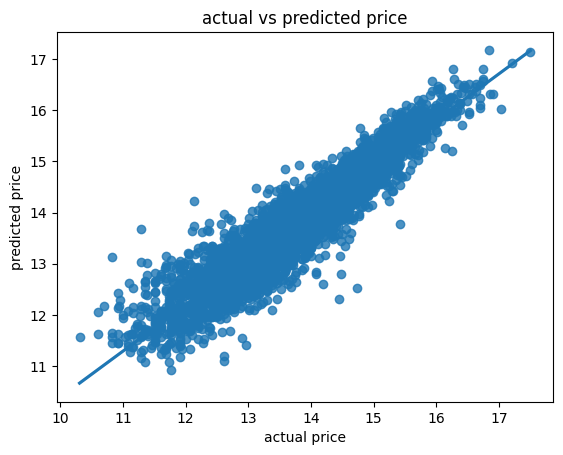

In [ ]:
sns.regplot(x=y_test,y=y_pred)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual vs predicted price')
plt.show()

# **12** . **Conclusion**

The project successfully cleansed, visualized, and prepared the car dataset for predictive modeling. The `RandomForestRegressor` model provided a strong baseline performance. Future improvements may include hyperparameter tuning, the use of more advanced algorithms, or integrating additional data features to further enhance the model.


# **13** **References**
1.Used Cars Dataset by Austin Reese

2.Kaggle

3.ChatGPT

4.Gemini